In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import sys

In [2]:
data = pd.read_csv('AirPassengers.csv')
data.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data['Month'] = pd.to_datetime(data['Month'])
indexData = data.set_index(['Month'])
indexData.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


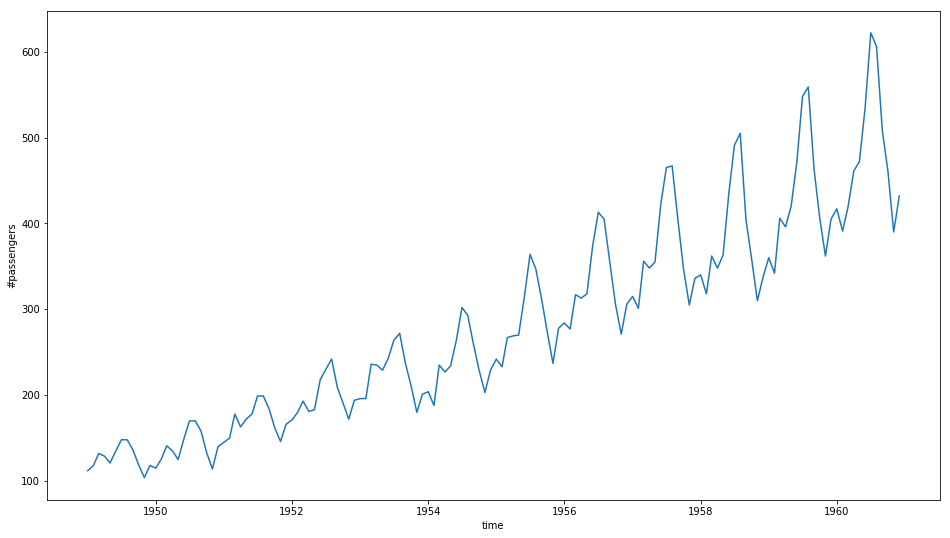

In [8]:
plt.figure(figsize = (16, 9))
plt.xlabel('time')
plt.ylabel('#passengers')
plt.plot(indexData)

In [9]:
#rolling statistics
rolmean = indexData.rolling(window = 12).mean()
rolstd = indexData.rolling(window = 12).std()
print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
1950-04-01   128.833333
1950-05-01   129.166667
1950-06-01   130.333333
1950-07-01   132.166667
1950-08-01   134.000000
1950-09-01   135.833333
1950-10-01   137.000000
1950-11-01   137.833333
1950-12-01   139.666667
1951-01-01   142.166667
1951-02-01   144.166667
1951-03-01   147.250000
1951-04-01   149.583333
1951-05-01   153.500000
1951-06-01   155.916667
...                 ...
1958-07-01   376.333333
1958-08-01   379.500000
1958-09-01   379.500000
1958-10-01   380.500000
1958-11-01   380.916667
1958-12-01   381.000000
1959-01-01   382.666667
1959-02-01   384.666667
1959-03-01   388

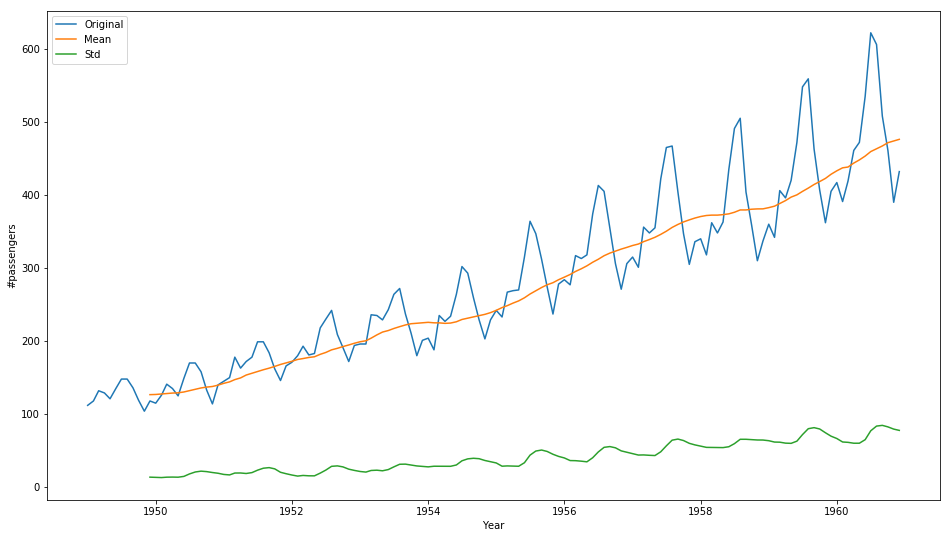

In [10]:
#plotting rolling statistics 
plt.figure(figsize = (16, 9))
plt.xlabel('Year')
plt.ylabel('#passengers')
plt.plot(indexData)
plt.plot(rolmean)
plt.plot(rolstd)
plt.legend(['Original', 'Mean', 'Std'])
plt.show()

In [14]:
#performing dickey fuller test
from statsmodels.tsa.stattools import adfuller
print('Results of dickey fuller test')
dftest = adfuller(indexData['#Passengers'], autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4], index = ['Test statistic', 'p_value', '#lags used', '#observations used'])
for key, value in dftest[4].items():
    dfoutput['Critical Values (%s)'%key] = value
print(dfoutput)

Results of dickey fuller test
Test statistic             0.815369
p_value                    0.991880
#lags used                13.000000
#observations used       130.000000
Critical Values (1%)      -3.481682
Critical Values (5%)      -2.884042
Critical Values (10%)     -2.578770
dtype: float64


In [17]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(ts):
    movingAvg = ts.rolling(window = 12).mean()
    movingStd = ts.rolling(window = 12).std()
    plt.figure(figsize = (16, 9))
    plt.plot(ts)
    plt.plot(movingAvg)
    plt.plot(movingStd)
    plt.legend(['Original', 'Mean', 'Variance'])
    plt.show()
    
    #dickey fuller
    print('Results of dickey fuller test')
    dftest = adfuller(ts['#Passengers'], autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test statistic', 'p_value', '#lags used', '#observations used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Values (%s)'%key] = value
    print(dfoutput)
    

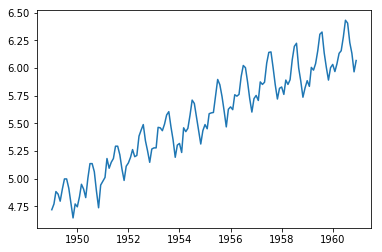

In [18]:
logData = np.log(indexData)
plt.plot(logData)

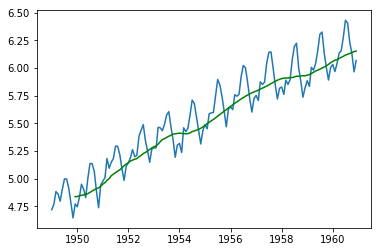

In [20]:
movingAvg = logData.rolling(window = 12).mean()
movingStd = logData.rolling(window = 12).std()
plt.plot(logData)
plt.plot(movingAvg, color = 'green')

In [22]:
logMinusMA = logData - movingAvg
logMinusMA.head(12)
logMinusMA.dropna(inplace = True)
logMinusMA.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


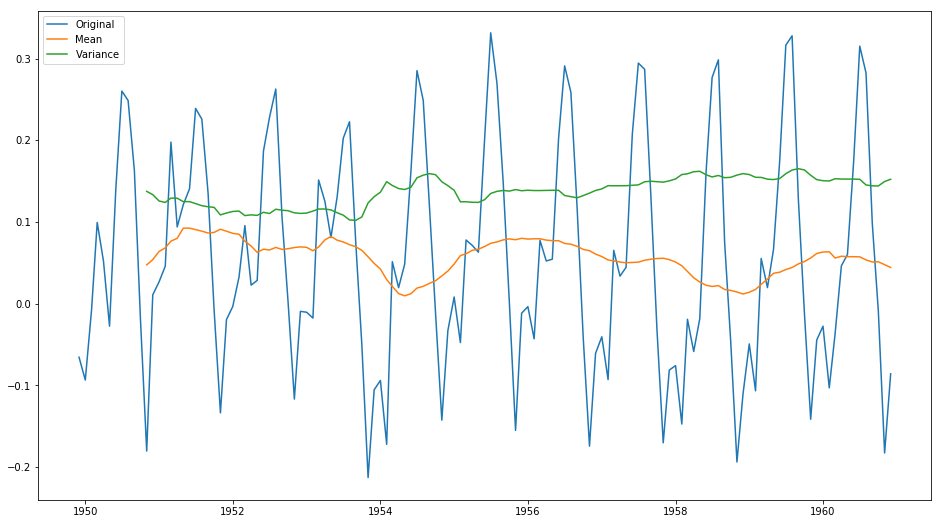

Results of dickey fuller test
Test statistic            -3.162908
p_value                    0.022235
#lags used                13.000000
#observations used       119.000000
Critical Values (1%)      -3.486535
Critical Values (5%)      -2.886151
Critical Values (10%)     -2.579896
dtype: float64


In [23]:
test_stationarity(logMinusMA)

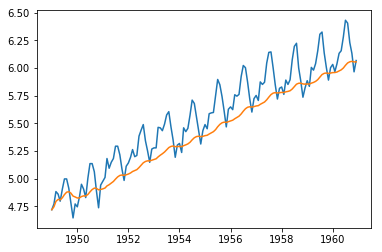

In [24]:
#exponential decay weighted average
expDecayWA = logData.ewm(halflife =12, min_periods = 0, adjust = True).mean()
plt.plot(logData)
plt.plot(expDecayWA)

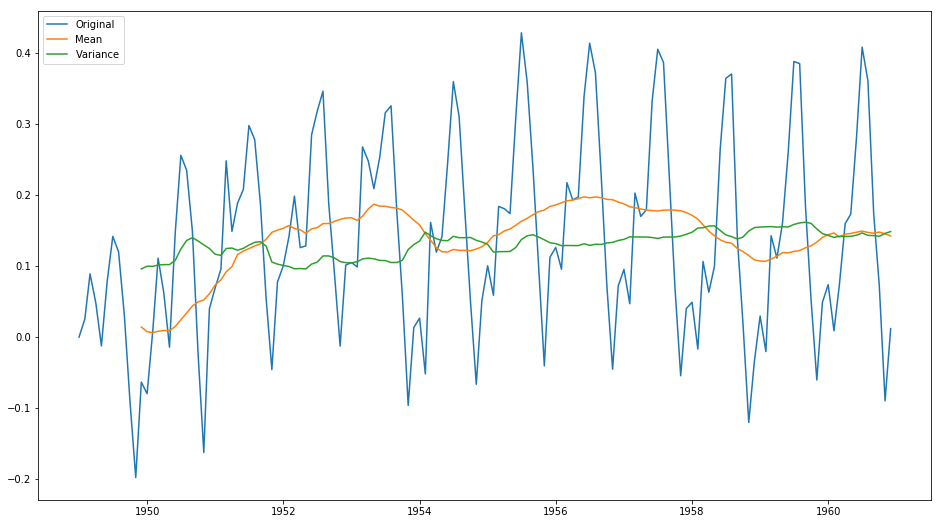

Results of dickey fuller test
Test statistic            -3.601262
p_value                    0.005737
#lags used                13.000000
#observations used       130.000000
Critical Values (1%)      -3.481682
Critical Values (5%)      -2.884042
Critical Values (10%)     -2.578770
dtype: float64


In [25]:
logMinusExpDecay = logData - expDecayWA
test_stationarity(logMinusExpDecay)

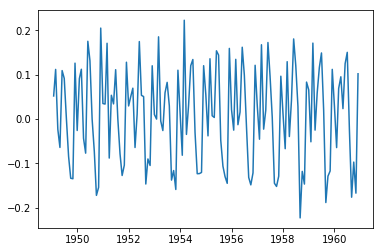

In [26]:
logDataShift = logData - logData.shift()
plt.plot(logDataShift)

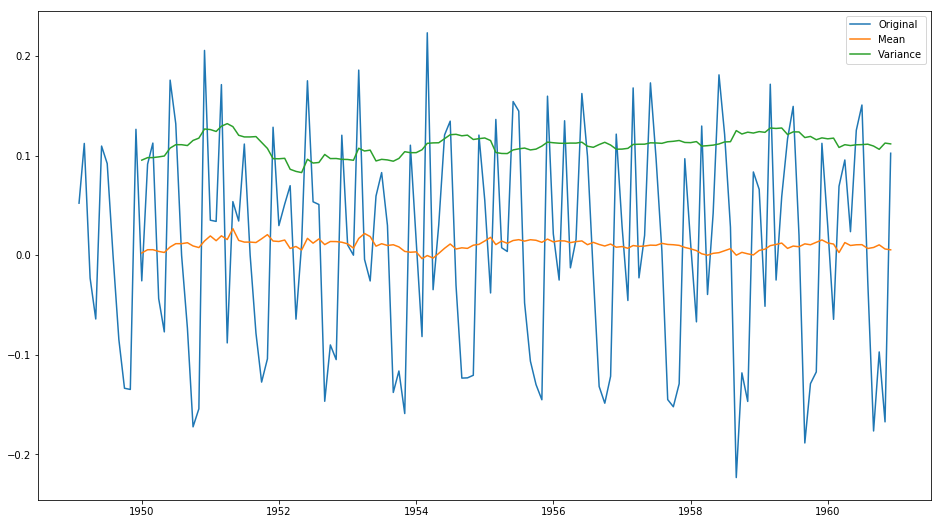

Results of dickey fuller test
Test statistic            -2.717131
p_value                    0.071121
#lags used                14.000000
#observations used       128.000000
Critical Values (1%)      -3.482501
Critical Values (5%)      -2.884398
Critical Values (10%)     -2.578960
dtype: float64


In [27]:
logDataShift.dropna(inplace = True)
test_stationarity(logDataShift)

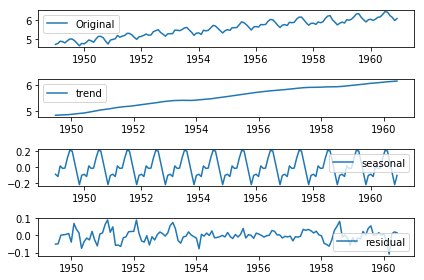

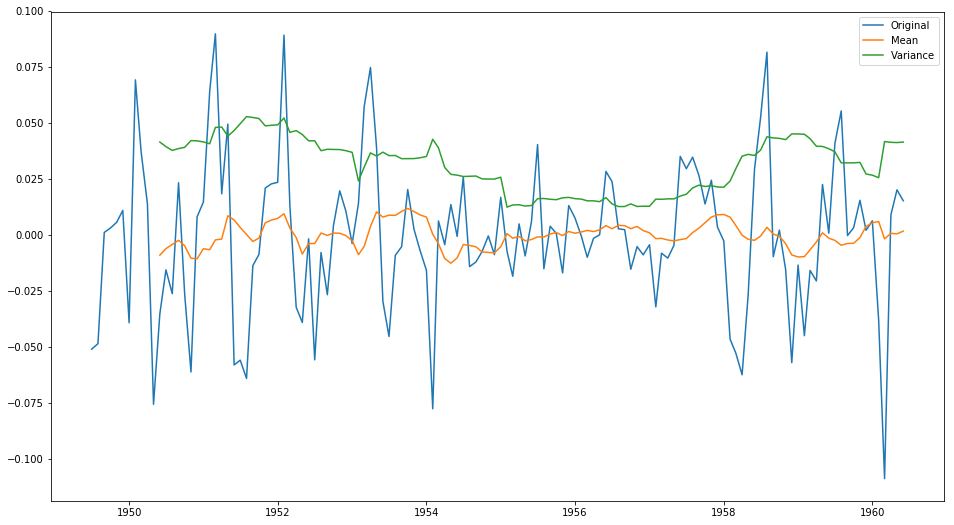

Results of dickey fuller test
Test statistic          -6.332387e+00
p_value                  2.885059e-08
#lags used               9.000000e+00
#observations used       1.220000e+02
Critical Values (1%)    -3.485122e+00
Critical Values (5%)    -2.885538e+00
Critical Values (10%)   -2.579569e+00
dtype: float64


In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(logData)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(logData, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label = 'seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label = 'residual')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
test_stationarity(decomposedLogData)


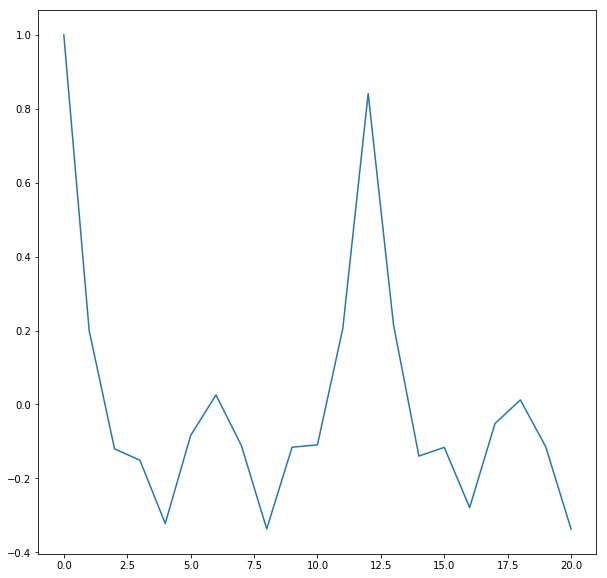

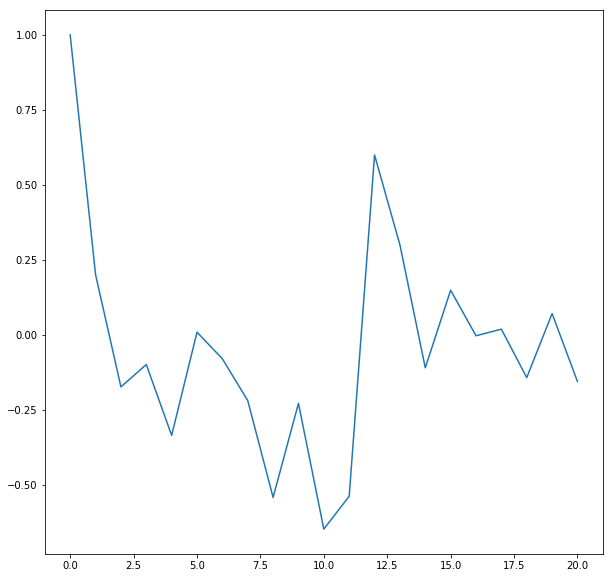

In [35]:
#acf and pacf plots
from statsmodels.tsa.stattools import acf, pacf
lagAcf = acf(logDataShift, nlags = 20)
lagPacf = pacf(logDataShift, nlags = 20, method = 'ols')

plt.figure(figsize = (10, 10))
plt.plot(lagAcf)
plt.show()
plt.figure(figsize = (10, 10))
plt.plot(lagPacf)
plt.show()

# P and Q value in the Arima model corresponds to the points 
# acf where pacf and graph cuts zero respectively




/home/aayushs879/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/aayushs879/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


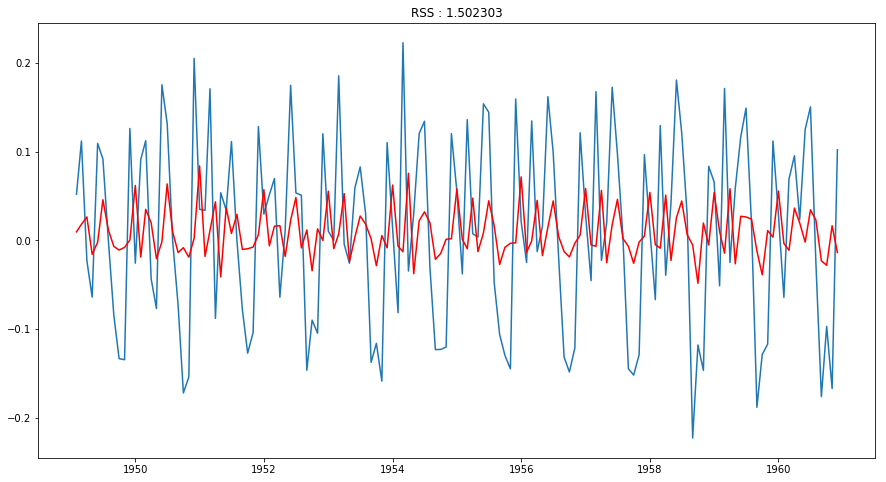

In [44]:
from statsmodels.tsa.arima_model import ARIMA

#AR model
model = ARIMA(logData, order = (2, 1, 0) )
resultsAR = model.fit(disp = -1)
plt.figure(figsize = (15, 8))
plt.plot(logDataShift)
plt.plot(resultsAR.fittedvalues, color = 'red')
plt.title('RSS : %f'%(sum((resultsAR.fittedvalues-logDataShift['#Passengers'])**2)))
print('Plotting AR model')

/home/aayushs879/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/aayushs879/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS : 1.472140')

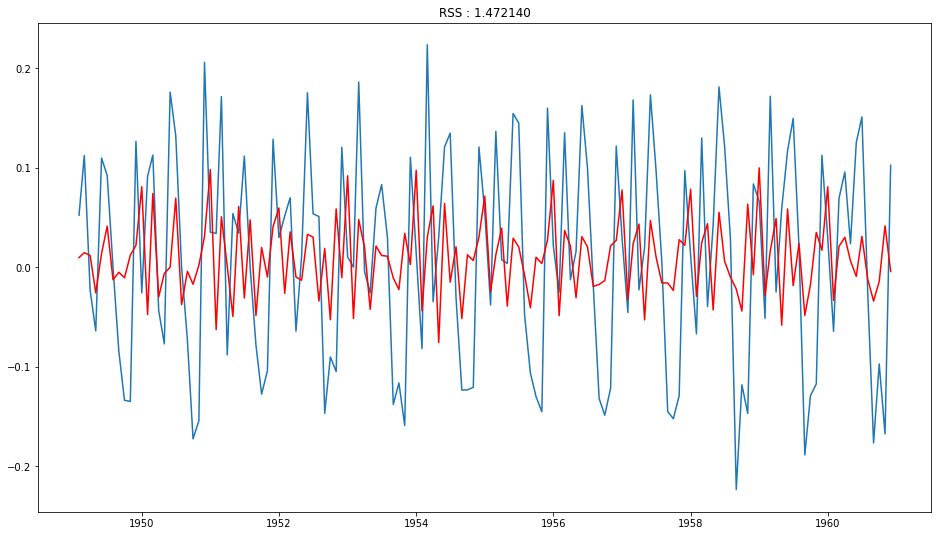

In [45]:
#MA model
model = ARIMA(logData, order = (0, 1, 2))
resultsMA = model.fit(disp = -1)
plt.figure(figsize = (16, 9))
plt.plot(logDataShift)
plt.plot(resultsMA.fittedvalues, color = 'red')
plt.title('RSS : %f'%sum((resultsMA.fittedvalues - logDataShift['#Passengers'])**2))

/home/aayushs879/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/aayushs879/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS : 1.029152')

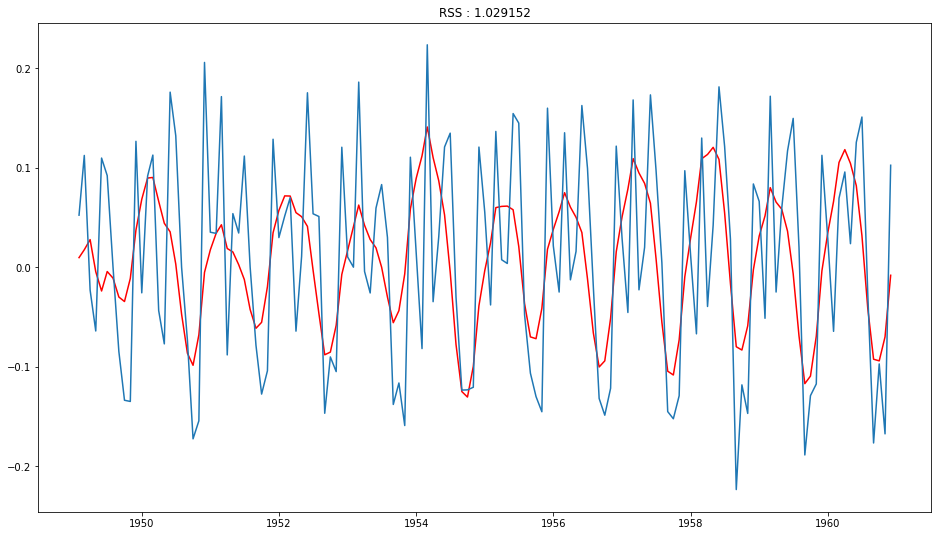

In [48]:
#ARIMA model 
model = ARIMA(logData, order = (2, 1, 2))
resultsArima = model.fit(disp = -1)
plt.figure(figsize = (16, 9))
plt.plot(resultsArima.fittedvalues, color = 'red')
plt.plot(logDataShift)
plt.title('RSS : %f'%sum((logDataShift['#Passengers'] - resultsArima.fittedvalues)**2))


In [49]:
predictionsArimaDiff = pd.Series(resultsArima.fittedvalues, copy = True)
print(predictionsArimaDiff.head(10))

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
1949-07-01   -0.004347
1949-08-01   -0.010978
1949-09-01   -0.029929
1949-10-01   -0.034467
1949-11-01   -0.011279
dtype: float64


In [50]:
predictionsArimaCumSum = predictionsArimaDiff.cumsum()
print(predictionsArimaCumSum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [53]:
predictionsArimaLog = pd.Series(logData['#Passengers'].ix[0], index = logData.index)
predictionsArimaLog = predictionsArimaLog.add(predictionsArimaCumSum, fill_value = 0)
predictionsArimaLog.head()

/home/aayushs879/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

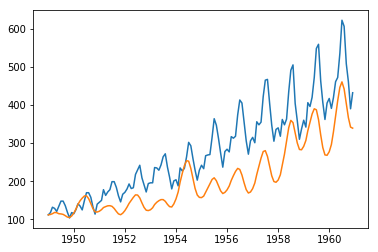

In [54]:
predictionsArima = np.exp(predictionsArimaLog)
plt.plot(indexData)
plt.plot(predictionsArima)

In [55]:
logData

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
1949-06-01,4.905275
1949-07-01,4.997212
1949-08-01,4.997212
1949-09-01,4.912655


<Figure size 1152x648 with 0 Axes>

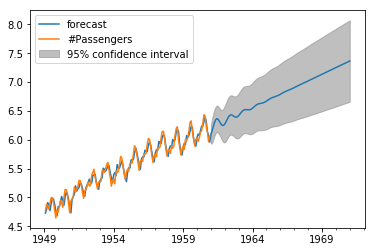

In [57]:
plt.figure(figsize = (16, 9))
resultsArima.plot_predict(1, 264) #264 because 144 previous(already given)data points and 120(for next ten years)
x = resultsArima.forecast(steps = 120)